<img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Matias Alvarez

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin((2\pi.f_0 + \phi_0).k/f_s),\space\space \forall k \in \Bbb{Z} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [ ]:
def generador_senoidal (fs, f0, N, a0=1, p0=0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función

    ts = 1/fs # tiempo de muestreo
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()
      
    # prestar atención que las tuplas dentro de los diccionarios también pueden direccionarse mediante "ii"
    signal = a0 * np.sin( 2*np.pi*f0*tt + p0 )
    # para concatenar horizontalmente es necesario cuidar que tengan iguales FILAS
    #x = np.hstack([x, signal.reshape(N,1)] )
            
    
    # fin de la función
    
    return tt, signal



In [ ]:
Se podria invocar la señal que genera ruido de la siguiente manera:

In [ ]:
def generador_ruido (fs, N, media, varianza):

    ts = 1/fs # tiempo de muestreo
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()

    signal = np.sqrt(varianza) * np.random.randn(N,1) + media

    # fin de la función
    
    return tt, signal

In [ ]:
Se podria invocar la señal que genera una señal cuadrada de la siguiente manera:

In [ ]:
def generador_cuadrada (A, d, N, fs):

    ts = 1/fs # tiempo de muestreo
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    
    #t = np.arange(0, N-1, ts)
    signal = A * sgn.square(2 * np.pi *tt, d)

    # fin de la función
    
    return tt, signal

a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import timeit
import scipy.fftpack as sc 
from scipy import signal as sgn

ModuleNotFoundError: No module named 'scipy'

In [ ]:
Ejemplo funcionamiento funcion generadora de senoidal:

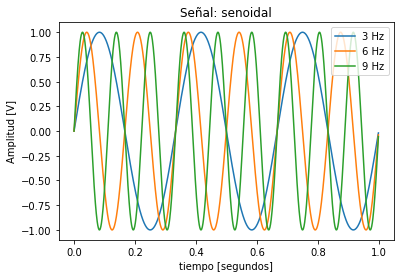

In [15]:
N  = 1000 # muestras
fs = 1000 # Hz

a0 = 1 # Volts
p0 = 0 # radianes

frec = [3, 6 , 9]

x = np.array([], dtype=np.float).reshape(N,0)

for i in range(0,3):
    t, signal = generador_senoidal (fs, frec[i], N, a0, p0)
    # para concatenar horizontalmente es necesario cuidar que tengan iguales FILAS
    x = np.hstack([x, signal.reshape(N,1)] )

plt.figure(1)

line_hdls = plt.plot(t, x)

plt.title('Señal: senoidal' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

axes_hdl = plt.gca()
axes_hdl.legend(line_hdls, [ str(a_freq) + ' Hz' for a_freq in frec ], loc='upper right'  )

plt.show()

In [16]:
Ejemplo funcionamiento funcion generadora de ruido:

SyntaxError: invalid syntax (<ipython-input-16-c47f8379e0ff>, line 1)

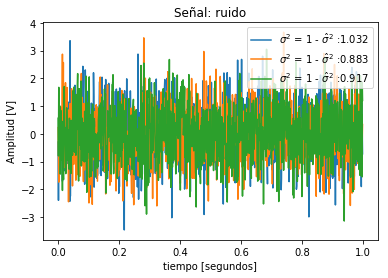

In [17]:
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

var = [1, 1, 1]

x = np.array([], dtype=np.float).reshape(N,0)

sig_props = { 'varianza': (1, 1, 1) } # Uso de tuplas para las frecuencias 
             
sig_props['descripcion'] = [ '$\sigma^2$ = ' + str(a_var) for a_var in sig_props['varianza'] ]

for var in sig_props['varianza']:
    t, signal = generador_ruido(fs, N, 0, var)
    # para concatenar horizontalmente es necesario cuidar que tengan iguales FILAS
    x = np.hstack([x, signal] )

sig_props['descripcion'] = [ sig_props['descripcion'][ii] + ' - $\hat{{\sigma}}^2$ :{0:.3f}'.format( np.var(x[:,ii]))  for ii in range(0,len(sig_props['descripcion'])) ]

plt.figure(1)

line_hdls = plt.plot(t, x)

plt.title('Señal: ruido' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

axes_hdl = plt.gca()
axes_hdl.legend(line_hdls, sig_props['descripcion'], loc='upper right')

plt.show()

In [18]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


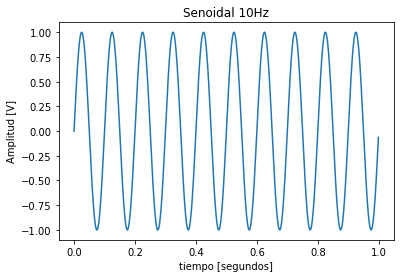

In [19]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

plt.figure(1)
plt.plot(tt, signal)

# presentar una leyenda para cada tipo de señal
plt.title('Senoidal 10Hz')

plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

plt.grid(which='both', axis='both')

plt.show()

¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si, dado que en el grafico visualizamos 10 periodos, es posible afirmar que se trata de una sinusoide de frecuencia 10Hz.
</div>

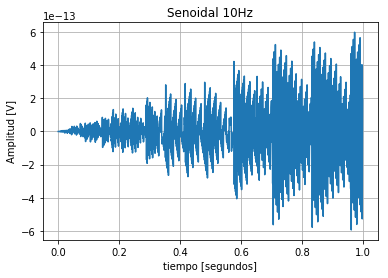

In [20]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

plt.figure(1)
plt.plot(tt, signal)

# presentar una leyenda para cada tipo de señal
plt.title('Senoidal 10Hz')

plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

plt.grid(which='both', axis='both')

plt.show()

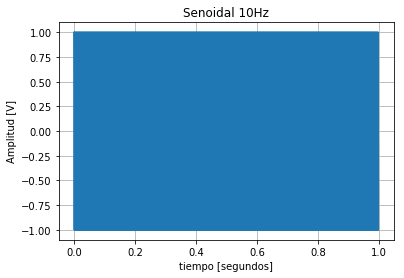

In [21]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

plt.figure(1)
plt.plot(tt, signal)

# presentar una leyenda para cada tipo de señal
plt.title('Senoidal 10Hz')

plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

plt.grid(which='both', axis='both')

plt.show()

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No, no podria.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

En el caso a.2 estamos muestreando a la frecuencia de Nyquist(sub-muestreando), y se obtienen 2 muestras por ciclo de la sinusoide que justamente coinciden con los ceros de la señal. La representacion de dichos ceros se va corriendo por la discretizacion del eje temporal y por la aproximacion que se realiza del numero "pi".

En el caso a.3, nuevamente estamos muestreando a la frecuencia de Nyquist(sub-muestreando), pero en este caso la señal esta desfazada pi/2 respecto a la anterior, y las muestras tomadas coinciden con los maximos y minimos de la señal en cada ciclo. El grafico interpola estos puntos y se visuliza como lineas verticales.
</div>

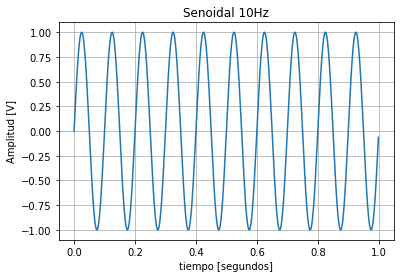

In [22]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

plt.figure(1)
plt.plot(tt, signal)

# presentar una leyenda para cada tipo de señal
plt.title('Senoidal 10Hz')

plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

plt.grid(which='both', axis='both')

plt.show()

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No, no es posible.
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La solucion a implementar podria ser aumentar la frecuencia de muestreo.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

In [23]:
def dft(signal):
    x = np.asarray(x, dtype=float)
    N = len(signal)
    
    n = np.arange(N)
    k = n.reshape([N, 1])
    exp = np.exp(-((2j * np.pi * n * k) / N))
    spectrum = np.dot(signal, exp)

    return spectrum

In [ ]:
Ejemplo con senoidal:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


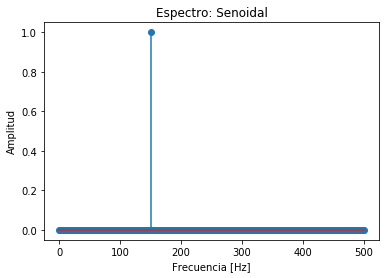

In [25]:
a0 = 1     # Volts
p0 = 0     # radianes
f0 = 150   # Hz

tt, signal = generador_senoidal(fs, f0, N, a0, p0)

spectrum = (2/N)*np.abs(dft(signal))

half = spectrum[:N//2] 

f = np.linspace(0, fs/2, N/2).flatten()

plt.figure(1)

plt.stem(f, half)

plt.title('Espectro: Senoidal' )
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud[V]')

plt.show()

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

In [26]:
N  = [16, 32, 64, 128, 256, 512, 1024, 2048] # muestras
fs = [16, 32, 64, 128, 256, 512, 1024, 2048] # Hz

a0 = 1     # Volts
p0 = 0     # radianes
f0 = 5     # Hz

L = len(N)

fftTime = [0] * L

dftTime = [0] * L

for i in range(L):
    tt, signal = generador_senoidal(fs[i], f0, N[i], a0, p0)

    #FFT
    timeStart = time.perf_counter()

    spectrumFFT = (2/N[i])*np.abs(sc.fft(signal))

    halfFFT = spectrumFFT[:N[i]//2] 

    fftTime[i] = time.perf_counter() - timeStart
    
    #DFT
    timeStart = time.perf_counter()

    spectrumDFT = (2/N[i])*np.abs(dft(signal))

    halfDFT = spectrumDFT[:N[i]//2]

    dftTime[i] = time.perf_counter() - timeStart

    tus_resultados[i] = dftTime[i]

plt.plot(N, fftTime, '-*r', label='FFT')
plt.plot(N, dftTime, '-*g', label='DFT')

plt.title('' )
plt.xlabel('Cantidad de muestras')
plt.ylabel('Tiempo de ejecucion[S]')

plt.show()

NameError: name 'sc' is not defined

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [ ]:
import time

the_start = time.process_time_ns() 
print("hello")
the_end = time.process_time_ns() 
print(the_start - the_end)

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [ ]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

resultados = [ ['DFT','FFT'], 
                   [str(dftTime[0]),str(fftTime[0])], # <-- acá debería haber numeritos :)
                   [str(dftTime[1]),str(fftTime[1])], # <-- acá debería haber numeritos :)
                   [str(dftTime[2]),str(fftTime[2])], # <-- acá debería haber numeritos :)
                   [str(dftTime[3]),str(fftTime[3])], # <-- acá debería haber numeritos :)
                   [str(dftTime[4]),str(fftTime[4])], # <-- acá debería haber numeritos :)
                   [str(dftTime[5]),str(fftTime[5])], # <-- acá debería haber numeritos :)
                   [str(dftTime[6]),str(fftTime[6])], # <-- acá debería haber numeritos :)
                   [str(dftTime[7]),str(fftTime[7])] # <-- acá debería haber numeritos :)
                 ]

df = DataFrame(resultados,columns=['tiempo transcurrido (s)',' '],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

In [ ]:
N  = 1024     # muestras
fs = 1024     # Hz

fd = np.array([[0.00], [0.01], [0.25], [0.5]])

a0 = 1      # Volts
p0 = 0      # radianes
f0 = fs/4 + fd      # Hz

L = len(fd)

tt, signal = generador_senoidal(fs, f0, N, a0, p0)

spectrum = (2/N)*np.abs(sc.fft(signal))     #arreglo bidimensional

halfSpectrum = spectrum[:,:N//2]            #arreglo bidimensional

f = np.linspace(0, fs/2, N/2).flatten()

for i in range(L):
    plt.figure(i+1)

    plt.stem(f, halfSpectrum[i])

    plt.title('FFT: $F_s/4$ + ' + str(fd[i]))
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud[V]')

    plt.show()

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [33]:
#######################################
# Tu simulación que genere resultados #
#######################################

total = [0, 0, 0, 0]

for i in range(L): 
    for j in range(N//2):
        if j != N//4:           #fs/4
            total[i] += (halfSpectrum[i][j] * halfSpectrum[i][j])   #Al cuadrado


resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
               ['',                        '',                           '$F:f \neq f_0$'], 
              [str(halfSpectrum[0][N//4]), str(halfSpectrum[0][N//4+1]), str(total[0])],
              [str(halfSpectrum[1][N//4]), str(halfSpectrum[1][N//4+1]), str(total[1])],
              [str(halfSpectrum[2][N//4]), str(halfSpectrum[2][N//4+1]), str(total[2])], 
              [str(halfSpectrum[3][N//4]), str(halfSpectrum[3][N//4+1]), str(total[3])]  
             ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,,,
$f_S/4+0.01$,,,
$f_S/4+0.25$,,,
$f_S/4+0.5$,,,


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

In [12]:
N  = 1024     # muestras
fs = 1024     # Hz

a0 = 1      # Volts
p0 = 0      # radianes
f0 = fs/4 + 0.5      # Hz

tt, signal = generador_senoidal(fs, f0, N, a0, p0)

padSignal = np.pad(signal, (N//10, 10*N), 'constant')

NN = N//10 + N + 10*N

spectrum = (2/NN)*np.abs(sc.fft(padSignal))    

halfSpectrum = spectrum[:NN//2]          

f = np.linspace(0, fs/2, NN/2).flatten()

plt.stem(f, halfSpectrum)

plt.title('FFT: $F_s/4$ + ' + str(0.5) + " Padding")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud[V]')

plt.show()

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Como la resolucion espectral es igual a Fs/N, siendo N el numero de muestras, y al aumentar N de la siguiente forma: 10*N + N + N/10, la resolucion espectral resultante es menor.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

In [ ]:
N  = 1024     # muestras
fs = 1024     # Hz

fd = np.array([[0.00], [0.01], [0.25], [0.5]])

a0 = 1      # Volts
p0 = 0      # radianes
f0 = fs/4 + fd      # Hz

L = len(fd)

tt, signal = generador_senoidal(fs, f0, N, a0, p0)

padSignal = np.pad(signal, (N//10, 10*N), 'constant')

NN = N//10 + N + 10*N

spectrum = (2/NN)*np.abs(sc.fft(padSignal))     #arreglo bidimensional

halfSpectrum = spectrum[:,:NN//2]            #arreglo bidimensional

f = np.linspace(0, fs/2, NN/2).flatten()

for i in range(L):
    plt.figure(i+1)

    plt.stem(f, halfSpectrum[i])

    plt.title('FFT: $F_s/4$ + ' + str(fd[i]))
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud[V]')

    plt.show()

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [32]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = ['', # <-- acá debería haber numeritos :)
                  '', # <-- acá debería haber numeritos :)
                  '', # <-- acá debería haber numeritos :)
                  '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())


,$e_\%$
0,
$N/10$,
$N$,
$10N$,
